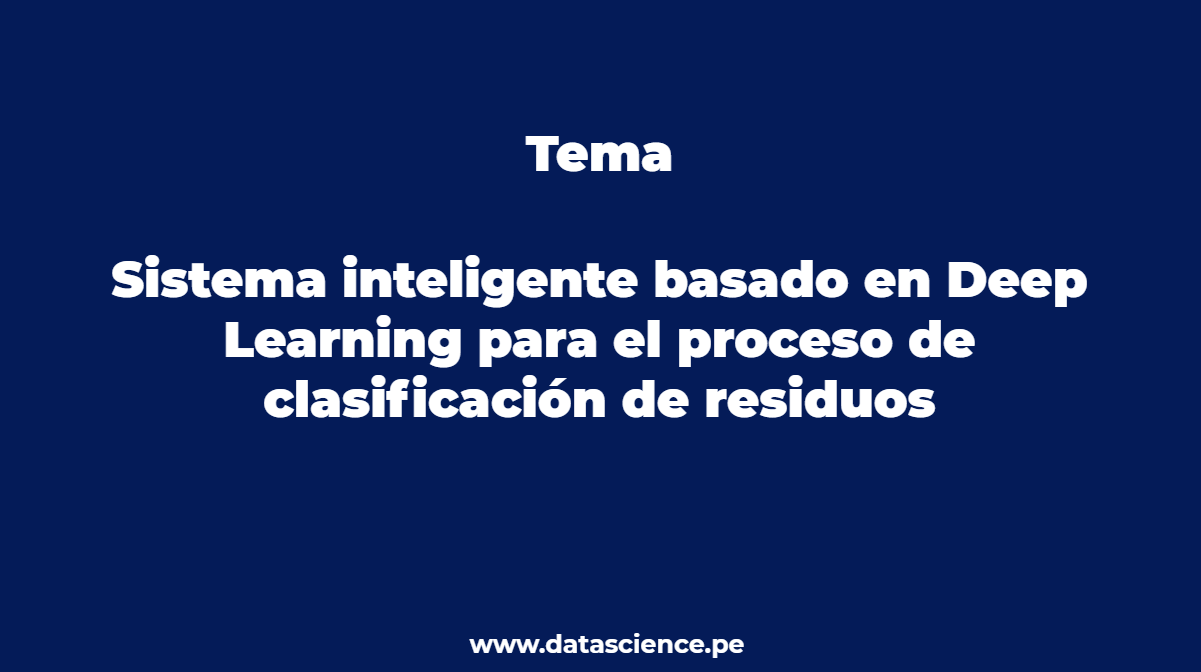

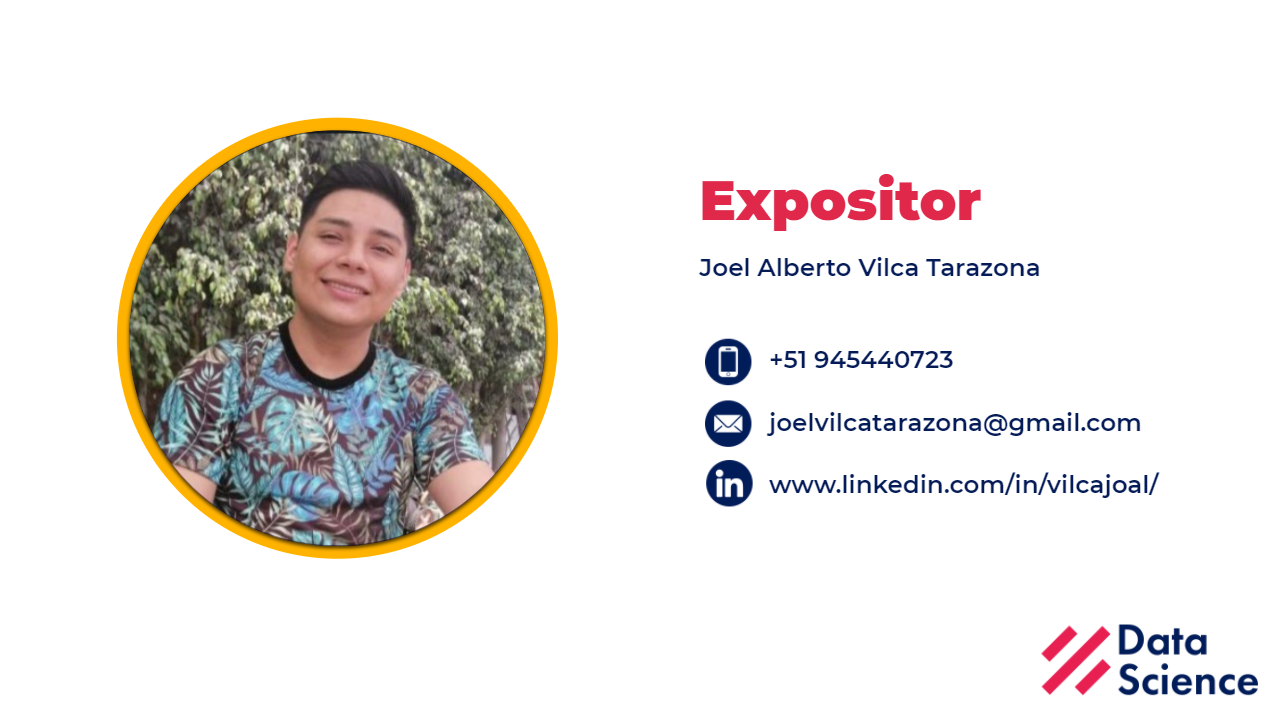

# TREE

# _1.IMPORTAR LIBRERÍAS_

###### -------[LIBRERÍAS DE 2. ](#2)-------

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from random import randrange
import glob

###### -------[LIBRERÍAS DE 3. ](#3)-------

In [7]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print('Tensorflow: ',tf.__version__)
from tensorflow import keras
print('TF Keras: ',keras.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Tensorflow:  2.5.0
TF Keras:  2.5.0


###### -------[LIBRERÍAS DE 4. ](#4)-------

In [9]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam

import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)
from keras.utils.vis_utils import pydot
from keras.utils.vis_utils import plot_model

###### -------[LIBRERÍAS DE 5. ](#5)-------

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

###### -------[LIBRERÍAS DE 6. ](#6)-------

###### -------[LIBRERÍAS DE 7. ](#7)-------

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# _2.CARGA DE DATOS_ <a id='2'></a>

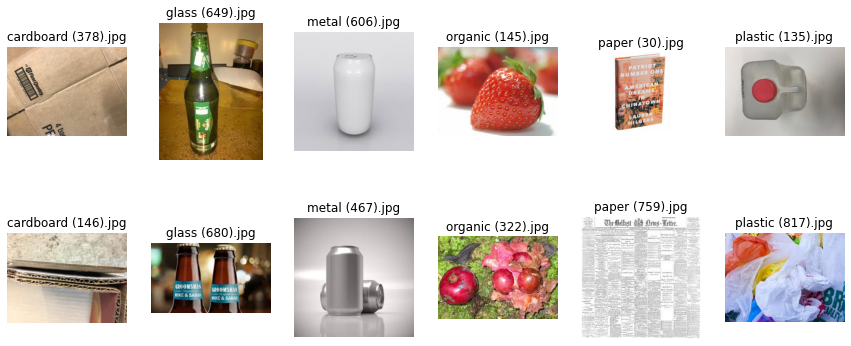

In [12]:
# Project main folder
project_folder = "Dataset"

#train
files_train_cardboard = glob.glob(project_folder+"/train/cardboard/*.jpg")
files_train_glass = glob.glob(project_folder+"/train/glass/*.jpg")
files_train_metal = glob.glob(project_folder+"/train/metal/*.jpg")
files_train_organic = glob.glob(project_folder+"/train/organic/*.jpg")
files_train_paper = glob.glob(project_folder+"/train/paper/*.jpg")
files_train_plastic = glob.glob(project_folder+"/train/plastic/*.jpg")

#test
files_test_cardboard = glob.glob(project_folder+"/test/cardboard/*.jpg")
files_test_glass = glob.glob(project_folder+"/test/glass/*.jpg")
files_test_metal = glob.glob(project_folder+"/test/metal/*.jpg")
files_test_organic = glob.glob(project_folder+"/test/organic/*.jpg")
files_test_paper = glob.glob(project_folder+"/test/paper/*.jpg")
files_test_plastic = glob.glob(project_folder+"/test/plastic/*.jpg")


#train random
file_train_cardboard = files_train_cardboard[randrange(len(files_train_cardboard))]
image_train_cardboard = tf.keras.preprocessing.image.load_img(file_train_cardboard)
file_train_glass = files_train_glass[randrange(len(files_train_glass))]
image_train_glass = tf.keras.preprocessing.image.load_img(file_train_glass)
file_train_metal = files_train_metal[randrange(len(files_train_metal))]
image_train_metal = tf.keras.preprocessing.image.load_img(file_train_metal)
file_train_organic = files_train_organic[randrange(len(files_train_organic))]
image_train_organic = tf.keras.preprocessing.image.load_img(file_train_organic)
file_train_paper = files_train_paper[randrange(len(files_train_paper))]
image_train_paper = tf.keras.preprocessing.image.load_img(file_train_paper)
file_train_plastic = files_train_plastic[randrange(len(files_train_plastic))]
image_train_plastic = tf.keras.preprocessing.image.load_img(file_train_plastic)

#test random
file_test_cardboard = files_test_cardboard[randrange(len(files_test_cardboard))]
image_test_cardboard = tf.keras.preprocessing.image.load_img(file_test_cardboard)
file_test_glass = files_test_glass[randrange(len(files_test_glass))]
image_test_glass = tf.keras.preprocessing.image.load_img(file_test_glass)
file_test_metal = files_test_metal[randrange(len(files_test_metal))]
image_test_metal = tf.keras.preprocessing.image.load_img(file_test_metal)
file_test_organic = files_test_organic[randrange(len(files_test_organic))]
image_test_organic = tf.keras.preprocessing.image.load_img(file_test_organic)
file_test_paper = files_test_paper[randrange(len(files_test_paper))]
image_test_paper = tf.keras.preprocessing.image.load_img(file_test_paper)
file_test_plastic = files_test_plastic[randrange(len(files_test_plastic))]
image_test_plastic = tf.keras.preprocessing.image.load_img(file_test_plastic)

imgs = [image_train_cardboard,image_train_glass,image_train_metal
            ,image_train_organic,image_train_paper,image_train_plastic
            ,image_test_cardboard,image_test_glass,image_test_metal
            ,image_test_organic,image_test_paper,image_test_plastic]

rutas = [file_train_cardboard,file_train_glass,file_train_metal,file_train_organic
           ,file_train_paper,file_train_plastic,file_test_cardboard,file_test_glass
           ,file_test_metal,file_test_organic,file_test_paper,file_test_plastic]

# Visualizando 12 figuras aleatorias
fig = plt.gcf()
fig.set_size_inches(15, 15)

for i in range(12):
    plt.subplot(2,6,i+1)
    plt.imshow(imgs[i])
    plt.title(rutas[i].split("\\")[-1])
    plt.axis("off")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.4, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

# _3.PREPROCESAMIENTO DE IMAGENES_ <a id='3'></a>

In [13]:
# imagenes reesaladas a 224x224
img_width = 224
img_height = 224
batch_size = 100

In [14]:
# ENTRENAMINETO

# aumento y normalizacion de datos 
datagen_train = ImageDataGenerator(rescale=1.0/255.0,      # Normalizar imagenes en range [0-1]
                                   horizontal_flip=True,   # Volteo horizontal
                                   rotation_range=15,      # Rotación aleatoria entre 0 y 15 grados
                                   width_shift_range=0.15,  # Mover la imagen horizontalmente 15%
                                   height_shift_range=0.15, # Mover imagen verticalmente 15%
                                   zoom_range=0.2)          # Acercar / Alejar aleatoriamente 20% => [80% - 120%]

# leer imagenes de carpeta conjunto train
training_set_imgs = datagen_train.flow_from_directory(project_folder + '/train',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size)

num_imgs_training = len(training_set_imgs.filenames)


print("Num. imganes de entrenamiento:", num_imgs_training)
print("Classes:", training_set_imgs.class_indices)  
print("Num. imgs Class [0]:", np.sum(training_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(training_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(training_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(training_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(training_set_imgs.labels == 4, axis=0))
print("Num. imgs Class [5]:", np.sum(training_set_imgs.labels == 5, axis=0))

Found 3600 images belonging to 6 classes.
Num. imganes de entrenamiento: 3600
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}
Num. imgs Class [0]: 600
Num. imgs Class [1]: 600
Num. imgs Class [2]: 600
Num. imgs Class [3]: 600
Num. imgs Class [4]: 600
Num. imgs Class [5]: 600


In [15]:
# VALIDACION

# aumento y normalizacion de datos
datagen_valid = ImageDataGenerator(rescale=1.0/255.0)    

# leer imagenes de carpeta conjunto validacion
valid_set_imgs = datagen_train.flow_from_directory(project_folder + '/valid',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size)

num_imgs_valid = len(valid_set_imgs.filenames)

print("Num. imganes de validacion:", num_imgs_valid)
print("Classes:", valid_set_imgs.class_indices)  
print("Num. imgs Class [0]:", np.sum(valid_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(valid_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(valid_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(valid_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(valid_set_imgs.labels == 4, axis=0))
print("Num. imgs Class [5]:", np.sum(valid_set_imgs.labels == 5, axis=0))

Found 1200 images belonging to 6 classes.
Num. imganes de validacion: 1200
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}
Num. imgs Class [0]: 200
Num. imgs Class [1]: 200
Num. imgs Class [2]: 200
Num. imgs Class [3]: 200
Num. imgs Class [4]: 200
Num. imgs Class [5]: 200


In [16]:
# TEST

datagen_test = ImageDataGenerator() 

test_set_imgs = datagen_train.flow_from_directory(project_folder + '/test',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size, shuffle=False)

num_imgs_test = len(test_set_imgs.filenames)

print("Num. imganes de test:", num_imgs_test)
print("Classes:", test_set_imgs.class_indices)  
print("Num. imgs Class [0]:", np.sum(test_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(test_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(test_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(test_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(test_set_imgs.labels == 4, axis=0))
print("Num. imgs Class [5]:", np.sum(test_set_imgs.labels == 5, axis=0))

Found 1200 images belonging to 6 classes.
Num. imganes de test: 1200
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}
Num. imgs Class [0]: 200
Num. imgs Class [1]: 200
Num. imgs Class [2]: 200
Num. imgs Class [3]: 200
Num. imgs Class [4]: 200
Num. imgs Class [5]: 200


# _4.MODELADO_ <a id='4'></a>

In [18]:
# Model: "vgg16""
vgg16_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
vgg16_conv.summary();

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
for layer in vgg16_conv.layers[:]:
    layer.trainable = False

In [20]:
for layer in vgg16_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001B805E47448> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B809EE6E08> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B809EE0308> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001B80A281B08> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B80A28F308> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B80A28B2C8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001B8107E6EC8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B8107F26C8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B8107F3FC8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B8107E6808> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001B8107F9A48> False
<tensorflow.python.

In [21]:
model = Sequential()

model.add(vgg16_conv)

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(6, activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 2

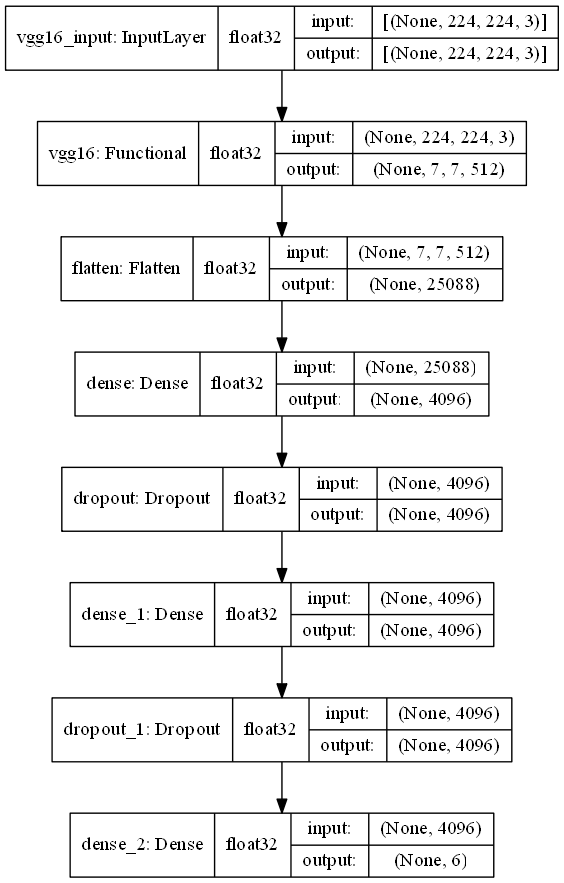

In [22]:
model.summary()
tf.keras.utils.plot_model(
    model, to_file='vgg16_model_plt.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=100
)

In [23]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#opt = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
epochs=10
history = model.fit_generator(training_set_imgs, 
                              epochs=epochs,
                              steps_per_epoch=np.ceil(num_imgs_training/batch_size),
                              validation_data=valid_set_imgs,
                              validation_steps=np.ceil(num_imgs_valid/batch_size))

Epoch 1/10
36/36 [==============================] - 574s 16s/step - loss: 1.4929 - accuracy: 0.4811 - val_loss: 0.9544 - val_accuracy: 0.6200
Epoch 2/10
36/36 [==============================] - 594s 17s/step - loss: 0.9283 - accuracy: 0.6414 - val_loss: 0.8231 - val_accuracy: 0.6775
Epoch 3/10
36/36 [==============================] - 576s 16s/step - loss: 0.8231 - accuracy: 0.6917 - val_loss: 0.8255 - val_accuracy: 0.7025
Epoch 4/10
36/36 [==============================] - 583s 16s/step - loss: 0.7282 - accuracy: 0.7214 - val_loss: 0.7030 - val_accuracy: 0.7283
Epoch 5/10
36/36 [==============================] - 584s 16s/step - loss: 0.6529 - accuracy: 0.7589 - val_loss: 0.6763 - val_accuracy: 0.7508
Epoch 6/10
36/36 [==============================] - 595s 17s/step - loss: 0.6293 - accuracy: 0.7714 - val_loss: 0.6394 - val_accuracy: 0.7583
Epoch 7/10
36/36 [==============================] - 581s 16s/step - loss: 0.5732 - accuracy: 0.7867 - val_loss: 0.6537 - val_accuracy: 0.7608
Epoch 

# _5.EVALUACIÓN DE MODELO_ <a id='5'></a>

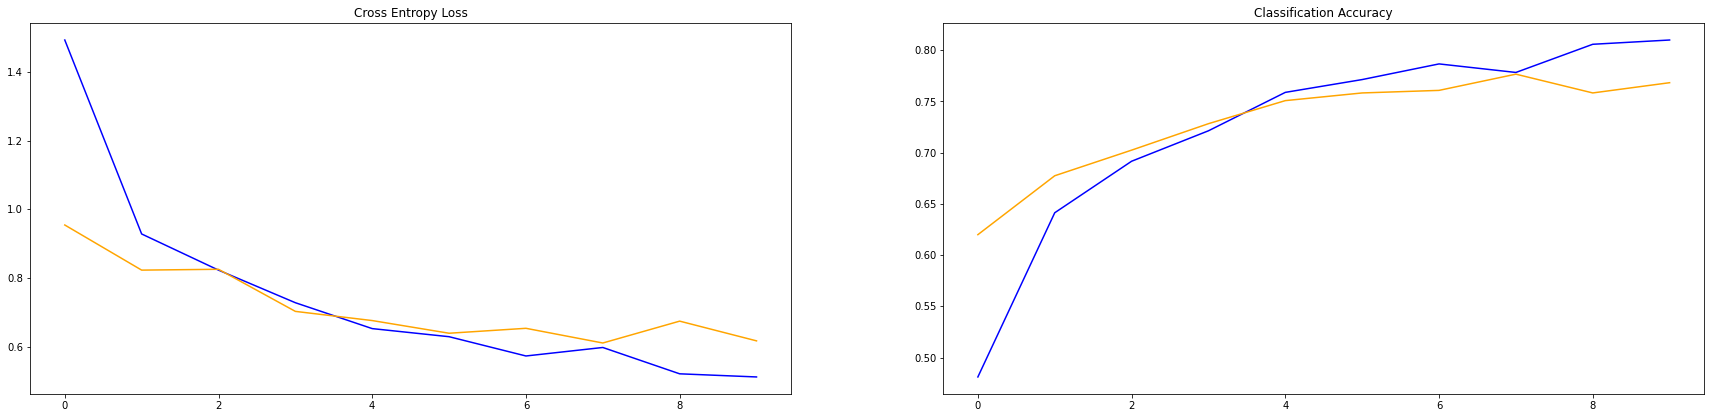

In [25]:
# plot loss
plt.figure(1, figsize=(30,15))
plt.subplot(221)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
plt.subplot(222)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [26]:
# Evaluating model
eval = model.evaluate_generator(test_set_imgs, steps=np.ceil(num_imgs_test/batch_size))
print('\nValidación en Test:')
print("Loss: {:.4}".format(eval[0]))
print("Accuracy: {:.2%}".format(eval[1]))


Validación en Test:
Loss: 0.6564
Accuracy: 76.67%


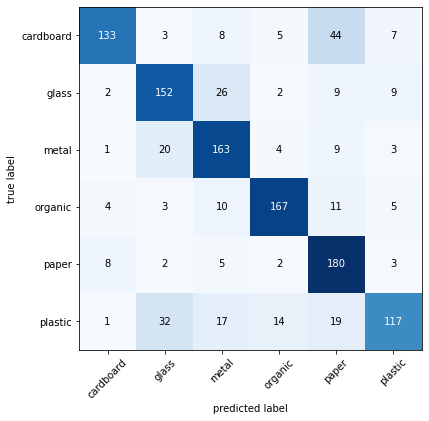

In [29]:
cm_plot_labels = [ 'cardboard','glass', 'metal', 'organic', 'paper', 'plastic']

predictions = model.predict_generator(generator=test_set_imgs)

y_pred = np.argmax(predictions, axis=1)
y_real = test_set_imgs.classes

matc=confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(6,6), class_names = cm_plot_labels, show_normed=False)
plt.tight_layout()

In [30]:
print(metrics.classification_report(y_real, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8926    0.6650    0.7622       200
           1     0.7170    0.7600    0.7379       200
           2     0.7118    0.8150    0.7599       200
           3     0.8608    0.8350    0.8477       200
           4     0.6618    0.9000    0.7627       200
           5     0.8125    0.5850    0.6802       200

    accuracy                         0.7600      1200
   macro avg     0.7761    0.7600    0.7584      1200
weighted avg     0.7761    0.7600    0.7584      1200



# _6.GUARDAR MODELO EN DISCO_ <a id='6'></a>

In [31]:
# Keras formato
carperta_proyecto = "F:\Repositorios\DSRP_Semillero_ClasificacionResiduos"
model.save(carperta_proyecto +"\Modelos\model_vgg16.h5", save_format='h5')
print("Modelo guardado en disco ...")

Modelo guardado en disco ...


# _7.PREDICCIONES_ <a id='7'></a>

In [32]:
loaded_model = load_model(carperta_proyecto + "\Modelos\model_vgg16.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 2

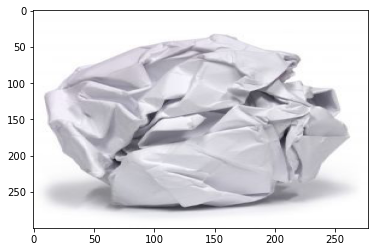

[0.01010183 0.00128938 0.0357519  0.00088975 0.7766795  0.17528763]
Index: 4
Pedicción: paper
Prob: 0.7766795


In [43]:
folder_ejemplos = carperta_proyecto+"/imgs"
img_ruta = folder_ejemplos + '/ejemplo_papel.jpg'
test_image = image.load_img(img_ruta)
plt.imshow(test_image, aspect="auto")
plt.show()

test_image = image.load_img(img_ruta,target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.astype('float32') 
test_image /= 255.0 

predictions = loaded_model.predict(test_image)[0]
print(predictions)
index = np.argmax(predictions)

CLASSES =  [ 'cardboard','glass', 'metal', 'organic', 'paper', 'plastic']
ClassPred = CLASSES[index]
ClassProb = predictions[index]

print("Index:", index)
print("Pedicción:", ClassPred)
print("Prob:", ClassProb)